In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


numpy: for numerical operations.

matplotlib.pyplot: for plotting images (optional).

mnist: built-in dataset from Keras containing 70,000 handwritten digits.

Sequential: a linear stack of layers.

Dense: fully connected neural network layer.

Flatten: reshapes image into a 1D vector.

to_categorical: converts class labels into one-hot encoded vectors.

Load and Explore the Data



In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


mnist.load_data() loads 60,000 training and 10,000 test 28x28 grayscale images of digits 0–9.

**Visualize Some Digits**


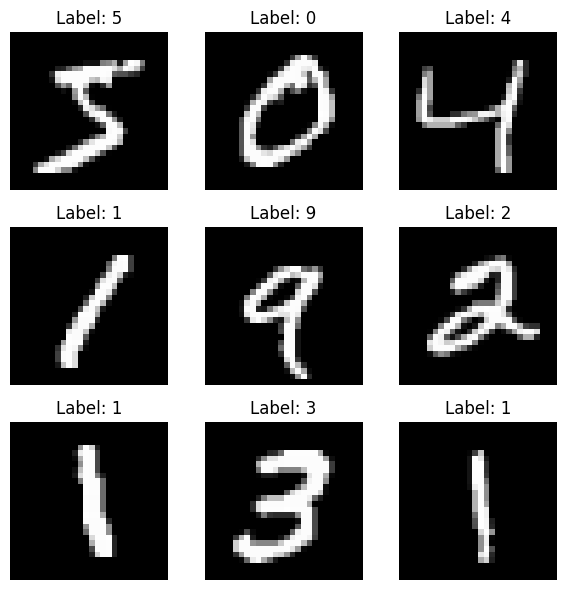

In [13]:

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


**Preprocess the Data**


In [14]:
# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Explanation:

x_train / 255.0: Scales pixel values to range 0–1.

to_categorical: Converts labels like 5 to [0,0,0,0,0,1,0,0,0,0].



**Build the Model**

In [15]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Convert 2D to 1D
    Dense(128, activation='relu'), # Hidden layer
    Dense(10, activation='softmax') # Output layer (10 classes)
])


Explanation:

Flatten: Converts 28x28 image into a 784-element vector.

Dense(128): Hidden layer with ReLU activation.

Dense(10): Output layer for 10 digit classes with softmax activation (probabilities).

**Compile the Model**

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Explanation:

adam: Optimization algorithm.

categorical_crossentropy: Loss function for multiclass classification.

accuracy: Evaluation metric.

**Train the Model**


In [17]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8705 - loss: 0.4583 - val_accuracy: 0.9637 - val_loss: 0.1356
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9623 - loss: 0.1277 - val_accuracy: 0.9748 - val_loss: 0.0878
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9764 - loss: 0.0805 - val_accuracy: 0.9762 - val_loss: 0.0814
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9836 - loss: 0.0572 - val_accuracy: 0.9760 - val_loss: 0.0782
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9872 - loss: 0.0438 - val_accuracy: 0.9775 - val_loss: 0.0753


 Explanation:

epochs=5: Number of times the model sees the entire dataset.

batch_size=32: Number of samples per gradient update.

validation_split=0.1: 10% of training data used for validation.



 **Evaluate the Model**

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0832
Test Accuracy: 97.76%


**Predict on Test Data**


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


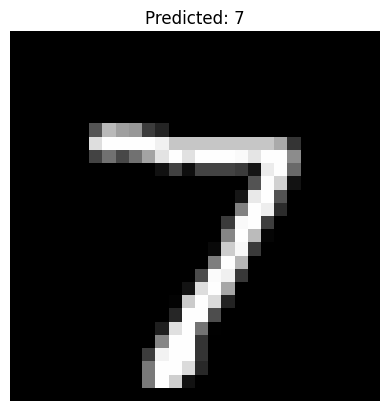

In [19]:
predictions = model.predict(x_test)

# Show one prediction
index = 0
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}")
plt.axis('off')
plt.show()


**Conclusion**

The MNIST Digit Recognition project successfully demonstrates the application of machine learning and deep learning techniques to solve a classic image classification problem. By preprocessing grayscale image data and training a neural network using TensorFlow/Keras, the model was able to accurately classify handwritten digits from 0 to 9.

This project not only solidified my understanding of key concepts such as data preprocessing, neural network architecture, activation functions, loss functions, and evaluation metrics but also helped me gain hands-on experience with real-world datasets and model deployment using Google Colab.

It lays a strong foundation for more advanced projects involving computer vision, convolutional neural networks (CNNs), and AI-powered applications in the future.

